# LinkR - plugin Prescription

In [1]:
# Librairies:

import pandas as pd
import seaborn as sns
import matplotlib as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots


# Drug Exposure

In [2]:
drug_exposure = pd.read_csv('Data/drug_exposure.csv')
print(drug_exposure.shape) #(18229, 23)
'''
['drug_exposure_id', 'person_id', 'drug_concept_id',
       'drug_exposure_start_date', 'drug_exposure_start_datetime',
       'drug_exposure_end_date', 'drug_exposure_end_datetime',
       'verbatim_end_date', 'drug_type_concept_id', 'stop_reason', 'refills',
       'quantity', 'days_supply', 'sig', 'route_concept_id', 'lot_number',
       'provider_id', 'visit_occurrence_id', 'visit_detail_id',
       'drug_source_value', 'drug_source_concept_id', 'route_source_value',
       'dose_unit_source_value']
'''
drug_exposure.person_id.value_counts()
'''
person_id
 7155255168997124770    1182
 4783904755296699562     791
 8090044958540695372     716
-3908355835367628651     687
 7131048714591189903     644
                        ... 
-2575767131279873665      37
-4183220989401122518      34
 1740609625029317924      26
 3912882389848878631      24
-8769042030325953499      18
'''
drug_exposure.info()
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18229 entries, 0 to 18228
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   drug_exposure_id              18229 non-null  int64  
 1   person_id                     18229 non-null  int64  
 2   drug_concept_id               18229 non-null  int64  
 3   drug_exposure_start_date      18229 non-null  object 
 4   drug_exposure_start_datetime  18229 non-null  object 
 5   drug_exposure_end_date        18229 non-null  object 
 6   drug_exposure_end_datetime    18229 non-null  object 
 7   verbatim_end_date             0 non-null      float64
 8   drug_type_concept_id          18229 non-null  int64  
 9   stop_reason                   0 non-null      float64
 10  refills                       0 non-null      float64
 11  quantity                      18220 non-null  float64
 12  days_supply                   0 non-null      float64
 13  sig                           0 non-null      float64
 14  route_concept_id              18229 non-null  int64  
 15  lot_number                    0 non-null      float64
 16  provider_id                   0 non-null      float64
 17  visit_occurrence_id           18229 non-null  int64  
 18  visit_detail_id               0 non-null      float64
 19  drug_source_value             18229 non-null  object 
 20  drug_source_concept_id        18229 non-null  int64  
 21  route_source_value            18223 non-null  object 
 22  dose_unit_source_value        18220 non-null  object 
 '''

drug_exposure.head()

liste_non_null = ['drug_exposure_id', 'person_id', 'drug_concept_id',  'drug_exposure_start_date', 'drug_exposure_start_datetime',
       'drug_exposure_end_date', 'drug_exposure_end_datetime', 'drug_type_concept_id',   'quantity',
       'route_concept_id', 'visit_occurrence_id', 'drug_source_value', 'drug_source_concept_id', 'route_source_value', 'dose_unit_source_value']


(18229, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18229 entries, 0 to 18228
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   drug_exposure_id              18229 non-null  int64  
 1   person_id                     18229 non-null  int64  
 2   drug_concept_id               18229 non-null  int64  
 3   drug_exposure_start_date      18229 non-null  object 
 4   drug_exposure_start_datetime  18229 non-null  object 
 5   drug_exposure_end_date        18229 non-null  object 
 6   drug_exposure_end_datetime    18229 non-null  object 
 7   verbatim_end_date             0 non-null      float64
 8   drug_type_concept_id          18229 non-null  int64  
 9   stop_reason                   0 non-null      float64
 10  refills                       0 non-null      float64
 11  quantity                      18220 non-null  float64
 12  days_supply                   0 non-null      fl

In [7]:
drug_exposure.describe()

,drug_exposure_id,person_id,drug_concept_id,verbatim_end_date,drug_type_concept_id,stop_reason,refills,quantity,days_supply,sig,route_concept_id,lot_number,provider_id,visit_occurrence_id,visit_detail_id,drug_source_concept_id
count,1.822900e+04,1.822900e+04,1.822900e+04,0.0,18229.0,0.0,0.0,18220.00000,0.0,0.0,1.822900e+04,0.0,0.0,1.822900e+04,0.0,1.822900e+04
mean,-6.796668e+16,1.022942e+18,2.682732e+07,NaN,32838.0,NaN,NaN,61.91895,NaN,NaN,4.933013e+06,NaN,NaN,2.141827e+17,NaN,3.044596e+08
std,5.296716e+18,5.426712e+18,1.615993e+07,NaN,0.0,NaN,NaN,221.40634,NaN,NaN,5.517099e+06,NaN,NaN,5.316908e+18,NaN,6.651866e+08
min,-9.223336e+18,-9.066461e+18,0.000000e+00,NaN,32838.0,NaN,NaN,0.00000,NaN,NaN,0.000000e+00,NaN,NaN,-9.176298e+18,NaN,0.000000e+00
25%,-4.678967e+18,-3.908356e+18,1.902013e+07,NaN,32838.0,NaN,NaN,1.00000,NaN,NaN,4.167540e+06,NaN,NaN,-4.450036e+18,NaN,4.496437e+07
50%,-8.222853e+16,1.741351e+18,3.560356e+07,NaN,32838.0,NaN,NaN,1.00000,NaN,NaN,4.171047e+06,NaN,NaN,5.353312e+17,NaN,4.515841e+07
75%,4.480493e+18,5.863607e+18,4.022135e+07,NaN,32838.0,NaN,NaN,2.00000,NaN,NaN,4.171047e+06,NaN,NaN,4.888187e+18,NaN,4.531944e+07
max,9.222143e+18,8.805478e+18,4.628762e+07,NaN,32838.0,NaN,NaN,10000.00000,NaN,NaN,4.595687e+07,NaN,NaN,9.099373e+18,NaN,2.000011e+09


In [10]:
drug_exposure.drug_exposure_start_datetime.value_counts()

drug_exposure_start_datetime
2125-02-27 18:00:00    40
2154-01-02 17:00:00    37
2118-11-16 12:00:00    37
2140-01-23 20:00:00    36
2150-04-10 07:00:00    36
                       ..
2116-06-30 22:00:00     1
2153-03-28 07:00:00     1
2153-03-28 19:00:00     1
2153-03-28 15:00:00     1
2136-08-05 19:00:00     1
Name: count, Length: 6814, dtype: int64

In [14]:
print(drug_exposure.drug_exposure_start_datetime[0], drug_exposure.drug_exposure_end_datetime[0])
# Can be different....

2177-07-16 22:00:00 2177-07-17 21:00:00


In [11]:
drug_exposure.drug_exposure_end_datetime.value_counts()

drug_exposure_end_datetime
2135-01-19 14:00:00    68
2117-03-24 16:00:00    55
2112-12-27 21:00:00    51
2120-05-15 07:00:00    50
2147-11-30 21:00:00    50
                       ..
2171-11-20 14:00:00     1
2171-11-22 11:00:00     1
2171-11-20 11:00:00     1
2171-11-22 14:00:00     1
2136-08-10 21:00:00     1
Name: count, Length: 5212, dtype: int64

In [ ]:
# ae there any datetime_end different from datetime_tart


### Patient 1: 3912882389848878631
On se concentre sur un premier cas avec 24 lignes pour 1 personne: 
Attention, c'est un integer, pas un texte. Ne pas mettre de ''


In [3]:
patient1 = drug_exposure.loc[drug_exposure['person_id'] == 3912882389848878631, liste_non_null]
'''
patient1.columns
Index(['drug_exposure_id', 'person_id', 'drug_concept_id',
       'drug_exposure_start_date', 'drug_exposure_start_datetime',
       'drug_exposure_end_date', 'drug_exposure_end_datetime',
       'drug_type_concept_id', 'quantity', 'route_concept_id',
       'visit_occurrence_id', 'drug_source_value', 'drug_source_concept_id',
       'route_source_value', 'dose_unit_source_value'],
      dtype='object')
'''
patient1

,drug_exposure_id,person_id,drug_concept_id,drug_exposure_start_date,drug_exposure_start_datetime,drug_exposure_end_date,drug_exposure_end_datetime,drug_type_concept_id,quantity,route_concept_id,visit_occurrence_id,drug_source_value,drug_source_concept_id,route_source_value,dose_unit_source_value
5622,6996991851384754967,3912882389848878631,40232756,2129-01-05,2129-01-05 00:00:00,2129-01-05,2129-01-05 01:00:00,32838,1.5000,4167540,3761046692024108622,00406055262,45266765,PO/NG,TAB
5623,-2528282390097198867,3912882389848878631,40232756,2129-01-04,2129-01-04 18:00:00,2129-01-04,2129-01-04 23:00:00,32838,0.5000,4167540,3761046692024108622,00406055262,45266765,PO/NG,TAB
5624,8598302712376844332,3912882389848878631,40232756,2129-01-05,2129-01-05 02:00:00,2129-01-05,2129-01-05 02:00:00,32838,1.0000,4167540,3761046692024108622,00406055262,45266765,PO/NG,TAB
5625,4557254971515693852,3912882389848878631,40232756,2129-01-04,2129-01-04 21:00:00,2129-01-04,2129-01-04 23:00:00,32838,1.0000,4167540,3761046692024108622,00406055262,45266765,PO/NG,TAB
5626,-290668764010704253,3912882389848878631,40221329,2129-01-05,2129-01-05 02:00:00,2129-01-05,2129-01-05 02:00:00,32838,1.0000,4171047,3761046692024108622,00409127332,45266797,IV,SYR
5627,1423514582191454168,3912882389848878631,36249736,2129-01-05,2129-01-05 03:00:00,2129-01-05,2129-01-05 18:00:00,32838,100.0000,4171047,3761046692024108622,00409792337,44891855,IV,mL
5628,700275630367800584,3912882389848878631,19126251,2129-01-10,2129-01-10 08:00:00,2129-01-10,2129-01-10 08:00:00,32838,0.5625,4167540,3761046692024108622,00603150858,45130527,PO/NG,SYR
5629,-345527215447771312,3912882389848878631,19126251,2129-01-11,2129-01-11 08:00:00,2129-01-11,2129-01-11 08:00:00,32838,0.2813,4167540,3761046692024108622,00603150858,45130527,PO/NG,SYR
5630,-992298387767609339,3912882389848878631,19126251,2129-01-08,2129-01-08 08:00:00,2129-01-08,2129-01-08 08:00:00,32838,1.1250,4167540,3761046692024108622,00603150858,45130527,PO/NG,SYR
5631,6012719603598400287,3912882389848878631,19126251,2129-01-06,2129-01-06 08:00:00,2129-01-06,2129-01-06 08:00:00,32838,2.2500,4167540,3761046692024108622,00603150858,45130527,PO/NG,SYR


In [4]:
patient1[patient1.dose_unit_source_value == 'TAB']
# 9 lignes, des exposure_id différentes, avec des dates différents (2129 ????)
# drug_concept_id being the name of the drug I guess, Quantity in Tablettes.


,drug_exposure_id,person_id,drug_concept_id,drug_exposure_start_date,drug_exposure_start_datetime,drug_exposure_end_date,drug_exposure_end_datetime,drug_type_concept_id,quantity,route_concept_id,visit_occurrence_id,drug_source_value,drug_source_concept_id,route_source_value,dose_unit_source_value
5622,6996991851384754967,3912882389848878631,40232756,2129-01-05,2129-01-05 00:00:00,2129-01-05,2129-01-05 01:00:00,32838,1.5,4167540,3761046692024108622,00406055262,45266765,PO/NG,TAB
5623,-2528282390097198867,3912882389848878631,40232756,2129-01-04,2129-01-04 18:00:00,2129-01-04,2129-01-04 23:00:00,32838,0.5,4167540,3761046692024108622,00406055262,45266765,PO/NG,TAB
5624,8598302712376844332,3912882389848878631,40232756,2129-01-05,2129-01-05 02:00:00,2129-01-05,2129-01-05 02:00:00,32838,1.0,4167540,3761046692024108622,00406055262,45266765,PO/NG,TAB
5625,4557254971515693852,3912882389848878631,40232756,2129-01-04,2129-01-04 21:00:00,2129-01-04,2129-01-04 23:00:00,32838,1.0,4167540,3761046692024108622,00406055262,45266765,PO/NG,TAB
5635,-6600566077470540957,3912882389848878631,21125875,2129-01-05,2129-01-05 08:00:00,2129-01-05,2129-01-05 18:00:00,32838,1.0,4167540,3761046692024108622,00904053061,45165542,PO/NG,TAB
5636,8139119374042756604,3912882389848878631,19137328,2129-01-05,2129-01-05 08:00:00,2129-01-05,2129-01-05 18:00:00,32838,1.0,4167540,3761046692024108622,00904054460,45114473,PO/NG,TAB
5639,-1076779580276771548,3912882389848878631,1127433,2129-01-03,2129-01-03 20:00:00,2129-01-05,2129-01-05 18:00:00,32838,2.0,4167540,3761046692024108622,51079000220,45325177,PO/NG,TAB
5640,-4804305780328125843,3912882389848878631,723020,2129-01-03,2129-01-03 19:00:00,2129-01-05,2129-01-05 02:00:00,32838,1.0,4167540,3761046692024108622,51079028620,45000972,PO/NG,TAB
5641,-2002420539696298274,3912882389848878631,19077513,2129-01-05,2129-01-05 08:00:00,2129-01-05,2129-01-05 18:00:00,32838,1.0,4167540,3761046692024108622,62584089701,44954855,PO/NG,TAB


<Axes: xlabel='drug_exposure_start_datetime', ylabel='cumulative'>

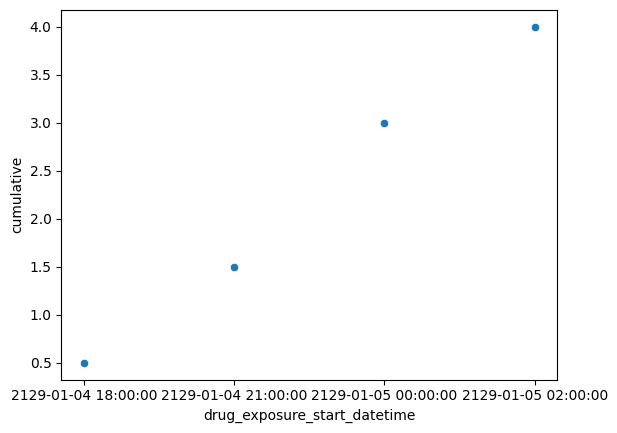

In [9]:
patient1_drug1 = patient1.loc[patient1.drug_concept_id==40232756,['drug_exposure_start_datetime', 'quantity']].sort_values(by='drug_exposure_start_datetime')



patient1_drug1['cumulative'] = [0.5, 1.5, 3.0, 4.0]



# ne fonctionne pas comme ça, car les date ne sont pas correct.... il faut prendre datetime déjà, puis trier en fonction du temps.
# il faut faire avec plotly un graph pour choisir le medoc.
# il faut calculer le cumulatif ou non ?
patient1_drug1


In [9]:
fig = make_subplots(rows = 1, cols = 2, subplot_titles=('not cumulative','cumulative'))
fig.add_traces(px.scatter(x = patient1_drug1.drug_exposure_start_datetime, y = patient1_drug1.cumulative))
#fig.add_traces(sns.scatterplot(x = patient1_drug1.drug_exposure_start_datetime, y = patient1_drug1.cumulative))
fig.show()

NameError: name 'patient1_drug1' is not defined

# Dose Era

In [6]:
dose_era = pd.read_csv('Data/dose_era.csv')
dose_era.head()

,dose_era_id,person_id,drug_concept_id,unit_concept_id,dose_value,dose_era_start_date,dose_era_end_date
0,-1101936257632052351,5548892236933978704,902427,8576,10.0,2142-05-14,2142-05-16
1,9002582707624403415,4985579811051920670,714785,8576,2.5,2110-04-13,2110-04-14
2,5495900697391314629,-4873075614181207858,1328165,8576,120.0,2148-09-15,2148-09-15
3,6335084700122752427,-8205283012979532608,1328165,8576,120.0,2189-06-11,2189-06-13
4,2848105832570024513,-4873075614181207858,1328165,8576,120.0,2147-12-20,2147-12-21


In [8]:
dose_era.unit_concept_id.value_counts()

unit_concept_id
8576    117
Name: count, dtype: int64

# Drug era

In [7]:
drug_era = pd.read_csv('Data/drug_era.csv')
drug_era.head()

,drug_era_id,person_id,drug_concept_id,drug_era_start_date,drug_era_end_date,drug_exposure_count,gap_days
0,-4731852071843461961,-2067961723109232727,1124957,2169-01-21,2169-01-24,1,0
1,1725818565432188772,-626229666378242477,1368671,2171-11-11,2171-11-16,2,1
2,3222075720408667327,-626229666378242477,967823,2171-11-11,2171-11-22,12,0
3,7411613425123823172,579254014084392336,1310149,2115-10-16,2115-10-18,2,0
4,4265287408545791371,-2312013739856114142,19095164,2116-06-28,2116-07-05,1,0
